# Question 2
Use visual analytics to represent and evaluate how the level of the risk to the 
public evolves over the course of the evening. Consider the potential 
consequences of the situation and the number of people who could be affected.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read in the cleaned datset
df = pd.read_csv('../Q1/data/combined_clean.csv')
df.head()

,type,date(yyyyMMddHHmmss),author,message,latitude,longitude,location,date,hour
0,mbdata,20140123170000,POK,Follow us @POK-Kronos,NaN,NaN,NaN,2014-01-23 17:00:00,17
1,mbdata,20140123170000,maha_Homeland,Don't miss a moment! Follow our live coverage...,NaN,NaN,NaN,2014-01-23 17:00:00,17
2,mbdata,20140123170000,Viktor-E,Come join us in the Park! Music tonight at Abi...,NaN,NaN,NaN,2014-01-23 17:00:00,17
3,mbdata,20140123170000,KronosStar,POK rally to start in Abila City Park. POK lea...,NaN,NaN,NaN,2014-01-23 17:00:00,17
4,mbdata,20140123170000,AbilaPost,POK rally set to take place in Abila City Park...,NaN,NaN,NaN,2014-01-23 17:00:00,17


/var/folders/m4/zxqjydts18zd_1ljl9ht18f40000gn/T/ipykernel_55936/1830250089.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('rocket_r')


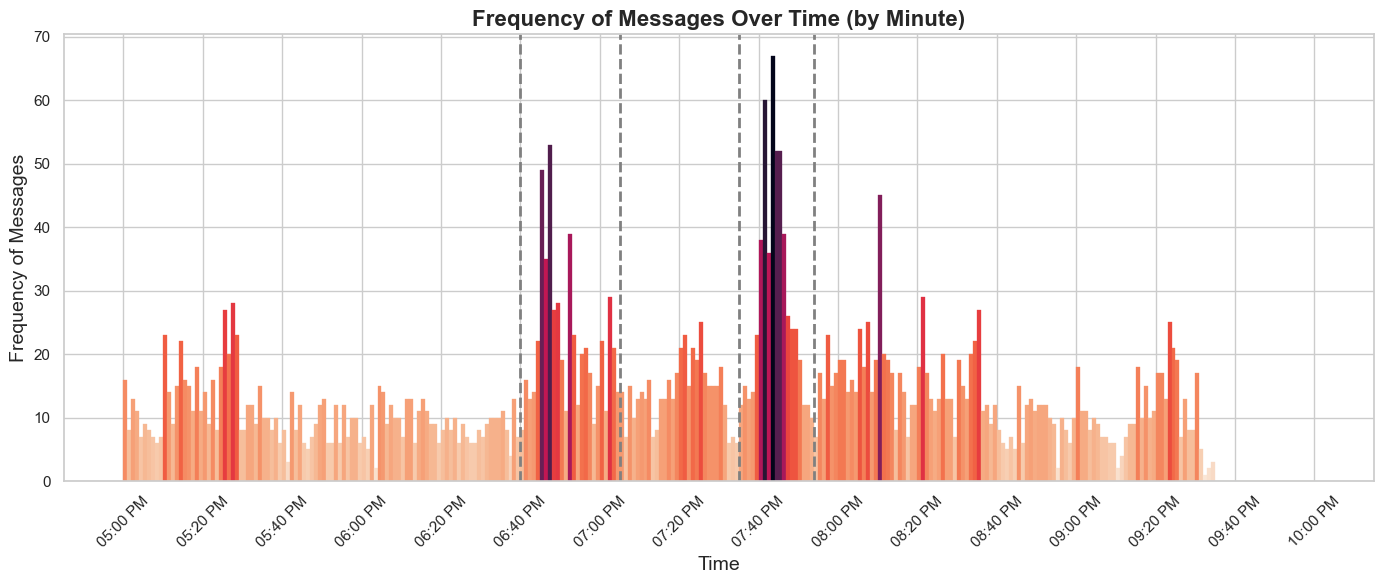

In [28]:
# Frequency of messages over time (mbdata) 
import matplotlib.cm as cm
import matplotlib.colors as colors

# Group by hour
df['date'] = pd.to_datetime(df['date(yyyyMMddHHmmss)'], format='%Y%m%d%H%M%S')
df['hour'] = df['date'].dt.hour 
df['minute'] = df['date'].dt.floor('min')

# Create bins for the histogram
hour_edges = pd.date_range('2014-01-23 17:00:00', '2014-01-23 22:00:00', freq='h')
min_edges = pd.date_range('2014-01-23 17:00:00', '2014-01-23 22:00:00', freq='min')
df['minute_numeric'] = df['minute'].astype('int64') // 10**9
min_edges_numeric = min_edges.astype('int64') // 10**9

# Plot and capture the histogram
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Visually highlight important timeframes
critical_timepoints = ['2014-01-23 18:40:00', '2014-01-23 19:05:00',
                       '2014-01-23 19:35:00', '2014-01-23 19:54:00']
critical_times = pd.to_datetime(critical_timepoints)
critical_times = critical_times.values.astype('int64') // 10**9
for t in critical_times:
    plt.axvline(x=t, color='grey', linestyle='--', linewidth=2)

hist = sns.histplot(
    df[df['type'] == 'mbdata']['minute_numeric'],
    bins=min_edges_numeric,
    color='#4287f5',  # Temporary color
    kde=False
)

# Normalize the heights
bars = hist.patches  # bars is a list of Rectangle objects
heights = [bar.get_height() for bar in bars]
norm = colors.Normalize(vmin=min(heights), vmax=max(heights))

# Choose a colormap (e.g., "viridis", "plasma", "coolwarm", "Blues", etc.)
cmap = cm.get_cmap('rocket_r')

# Apply color based on height
for bar, height in zip(bars, heights):
    bar.set_color(cmap(norm(height)))

# Labels & title
plt.title('Frequency of Messages Over Time (by Minute)', fontsize=16, weight='bold')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Frequency of Messages', fontsize=14)

# Set x-ticks with formatted time
formatted_ticks = [tick.strftime('%I:%M %p') for tick in min_edges]
plt.xticks(ticks=min_edges_numeric[::20], labels=formatted_ticks[::20], rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()
